# Sentiment analysis using Web Scrapping

### Libraries: 

In [1]:
# pip install snscrape

In [2]:
import snscrape.modules.twitter as snstwitter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Dataset creation

In [3]:
### I will look for Loewe information in Twitter
query = 'Loewe lang:en until:2023-02-21 since:2023-01-01'
tweets =[]
limit = 10000

In [4]:
for tweet in snstwitter.TwitterSearchScraper(query).get_items():
    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date,tweet.username,tweet.content])
df = pd.DataFrame(tweets,columns = ['Date','User','Content'])
print (df)

C:\Users\luisf\AppData\Local\Temp/ipykernel_20312/3622701087.py:7: FutureWarning: username is deprecated, use user.username instead
  tweets.append([tweet.date,tweet.username,tweet.content])
C:\Users\luisf\AppData\Local\Temp/ipykernel_20312/3622701087.py:7: FutureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date,tweet.username,tweet.content])


                          Date             User  \
0    2023-02-20 23:47:08+00:00          GgV0gue   
1    2023-02-20 23:44:38+00:00        drewloewe   
2    2023-02-20 23:43:08+00:00     isthatscully   
3    2023-02-20 23:41:31+00:00        drewloewe   
4    2023-02-20 23:33:56+00:00     nadia_gilani   
...                        ...              ...   
9995 2023-01-09 16:01:17+00:00        SAlertPro   
9996 2023-01-09 15:46:05+00:00        SAlertPro   
9997 2023-01-09 15:42:13+00:00  ShoppingAlertUK   
9998 2023-01-09 15:27:12+00:00  ShoppingAlertUK   
9999 2023-01-09 15:16:09+00:00    AngoisseNCTRN   

                                                Content  
0     @dad_in_plaid_ @dopeypolitics @MediumSizeMeech...  
1     @davideelder A more interesting question is "S...  
2     @RowBlack_ they literally domestic abuse each ...  
3     @davideelder @CaddieNetwork Indeed. That's why...  
4     walking around correctly people who mispronoun...  
...                                    

### Bag Analysis:

In [5]:
bags = df[df['Content'].str.contains ('bag',regex  = False, case = False)]

In [6]:
top_users = bags['User'].value_counts().head(10).reset_index()

In [24]:
# Top users with higher number of tweets about bags: 
top_users

,User profile,Count
0,SAlertPro,273
1,SAlertUSA,240
2,ShoppingAlertUK,172
3,ShoppingAlertCA,160
4,SABeautyStyle,136
5,HandbagsBags,12
6,WomenClothesSh1,7
7,LoeweOfficial,6
8,ClothesShoesAc2,5
9,A_TO_Z_SHOPPING,4


In [8]:
top_users = top_users.rename({'index':'User profile','User':'Count'},axis = 'columns')

<function matplotlib.pyplot.show(close=None, block=None)>

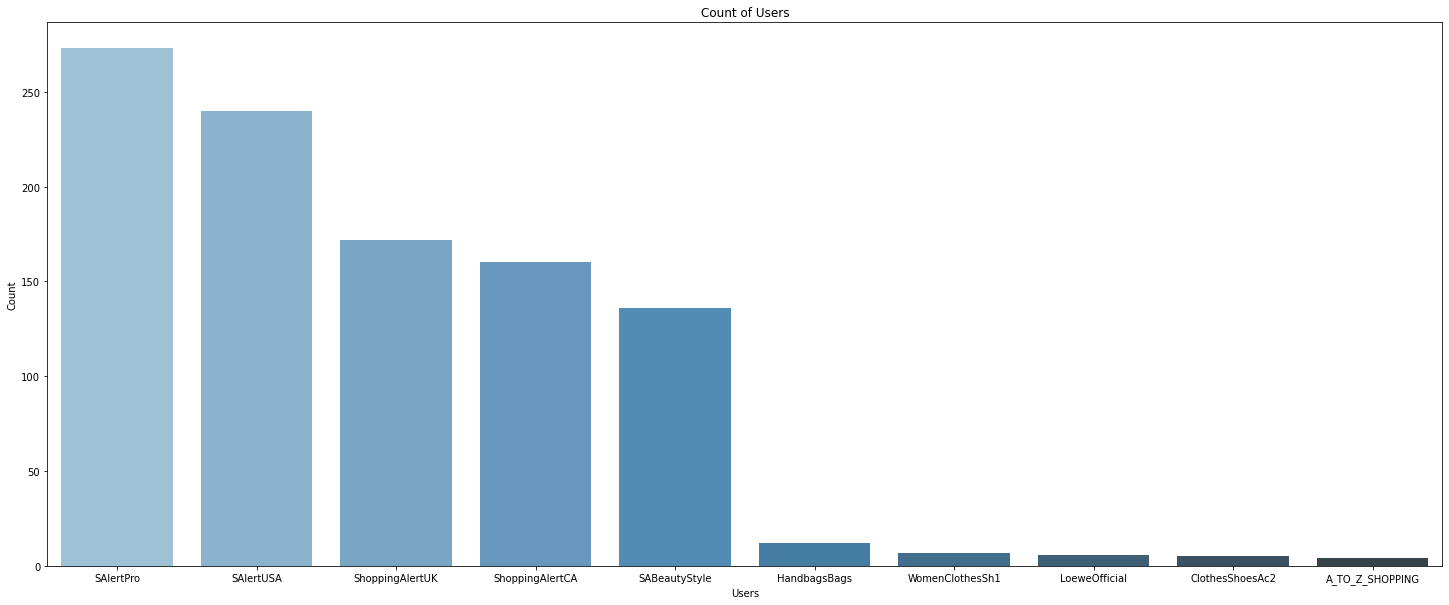

In [9]:
plt.figure(figsize = (25,10))
sns.barplot(x='User profile',y = 'Count',data = top_users,palette = 'Blues_d')
plt.title("Count of Users")
plt.xlabel("Users")
plt.ylabel("Count")
plt.show

#### Sentiment Analysis:

1. Using Vader from NLTK. For "Puzzle" or "Puzzle Bag"

In [10]:
top_phrases = bags['Content'].value_counts().reset_index()

In [11]:
top_phrases = top_phrases.rename({'index':'Phrase','Content':'Count'},axis = 'columns')

In [12]:
cond = top_phrases['Phrase'].str.contains('puzzle')
puzzle_bags = top_phrases[cond]

In [13]:
import nltk

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [15]:
sentences = puzzle_bags['Phrase'].tolist()

In [16]:
sentences = str(sentences)

In [17]:
tokens = nltk.word_tokenize(sentences)
tagged = nltk.pos_tag(tokens)

In [18]:
sid = SentimentIntensityAnalyzer()
resultados = sid.polarity_scores(sentences)

In [19]:
resultados
# neg = negative
# neu = neutral
# pos = positive
# compound = score at the end of the message, values from -1 to 1

{'neg': 0.05, 'neu': 0.847, 'pos': 0.102, 'compound': 0.996}

2. Using Vader from NLTK. From the word "Amazona Bag"

In [20]:
top_phrases = bags['Content'].value_counts().reset_index()
top_phrases = top_phrases.rename({'index':'Phrase','Content':'Count'},axis = 'columns')
cond = top_phrases['Phrase'].str.contains('Amazona')
puzzle_bags = top_phrases[cond]

In [21]:
# Phrases:
sentences = puzzle_bags['Phrase'].tolist()
sentences = str(sentences)

#Tokens:
tokens = nltk.word_tokenize(sentences)
tagged = nltk.pos_tag(tokens)

# Analyser: 
sid = SentimentIntensityAnalyzer()
results = sid.polarity_scores(sentences)

In [22]:
results

{'neg': 0.001, 'neu': 0.935, 'pos': 0.064, 'compound': 0.998}

In [23]:
top_phrases

,Phrase,Count
0,@ohmybeautybank loewe puzzle bag,2
1,"Loewe Menswear Sale @ MR PORTER US, Puzzle bag...",2
2,loewe coat and rimowa clutchbag\n\n(loewe's sc...,1
3,Loewe is doing a Howl’s Moving Castle collab a...,1
4,Auth LOEWE - Navy Leather Business Bag\nhttps:...,1
...,...,...
1458,@navusare It’s a collaboration with some kind ...,1
1459,@LoeweOfficial U gave this bag to Taeyong nct....,1
1460,@entomorphia Yeah!! I think semi-casual would ...,1
1461,Soo is puffy padded bags and stuff the new tre...,1


### New collection analysis:

In [31]:
new_colection = df[df['Content'].str.contains ('Howl’s',regex  = False, case = False)]
new_colection.head()

,Date,User,Content,day
130,2023-02-20 14:39:20+00:00,CannyFood,Do I flog my Loewe/Howl’s freebies on eBay lik...,20
153,2023-02-20 11:19:44+00:00,AnyaImane,Half of the loewe x Howl’s moving castle colle...,20
164,2023-02-20 10:40:28+00:00,NMIXXLlLY,"Verily, fashion never disappoints me. Enormous...",20
190,2023-02-20 07:51:08+00:00,y0urjAgiy4,If someone ever bought me the Loewe Howl’s Mov...,20
299,2023-02-19 22:31:33+00:00,thesoftestaura,"loewe x howl’s moving castle, 2023 https://t.c...",19


In [65]:
# Time series: 
new_colection['Date'] = pd.to_datetime(new_colection['Date'],format = '%Y-%m-%d')
new_colection['day']=new_colection['Date'].dt.day
new_colection['month']=new_colection['Date'].dt.month

C:\Users\luisf\AppData\Local\Temp/ipykernel_20312/2045827373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_colection['Date'] = pd.to_datetime(new_colection['Date'],format = '%Y-%m-%d')
C:\Users\luisf\AppData\Local\Temp/ipykernel_20312/2045827373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_colection['day']=new_colection['Date'].dt.day
C:\Users\luisf\AppData\Local\Temp/ipykernel_20312/2045827373.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [83]:
line = new_colection.groupby(['month','day']).agg({'User':'count'}).sort_values(['month','day']).reset_index()

In [86]:
line = line.rename({'User':'User count'},axis = 'columns')
line.head()
jan = line[line.month == 1]
feb = line[line.month == 2]

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1800x720 with 0 Axes>

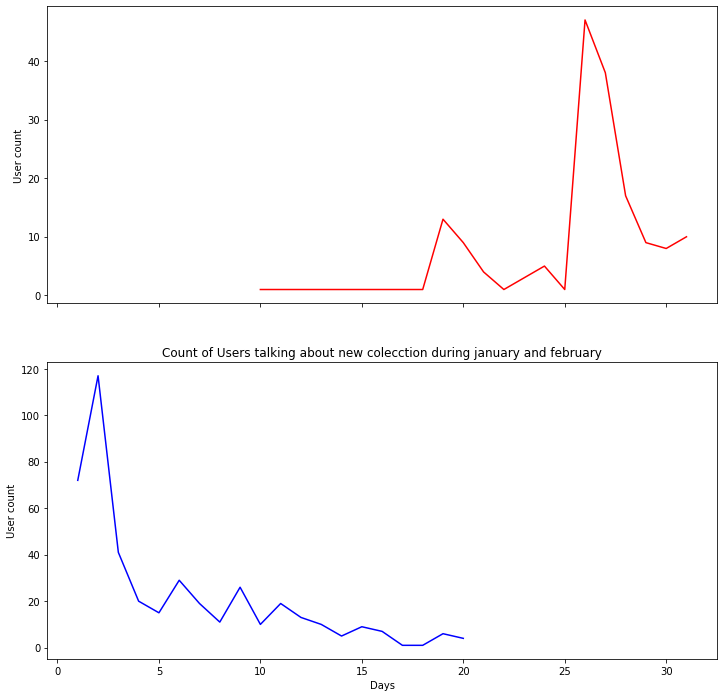

In [97]:
# Trend analysis:

plt.figure(figsize = (25,10))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

plt.title("Count of Users talking about new colecction during january and february")
# Graph 1:
ax1.plot(jan.day, jan['User count'], color='red')
ax1.set_ylabel('User count')

# Graph 2: 
ax2.plot(feb.day, feb['User count'], color='blue')
ax2.set_ylabel('User count')

plt.xlabel('Days')
plt.show

In [27]:
top_users = new_colection['User'].value_counts().head(10).reset_index()
top_users = top_users.rename({'index':'User profile','User':'Count'},axis = 'columns')
top_users

,User profile,Count
0,NMIXXBRASIL,31
1,BrasilHaewon,8
2,NMIXXGLOBAL,8
3,championistic,8
4,Gematale,7
5,nmixxpics_,7
6,LoeweOfficial,6
7,heawonr,5
8,dramapotatoe,5
9,staricsverse,5


<function matplotlib.pyplot.show(close=None, block=None)>

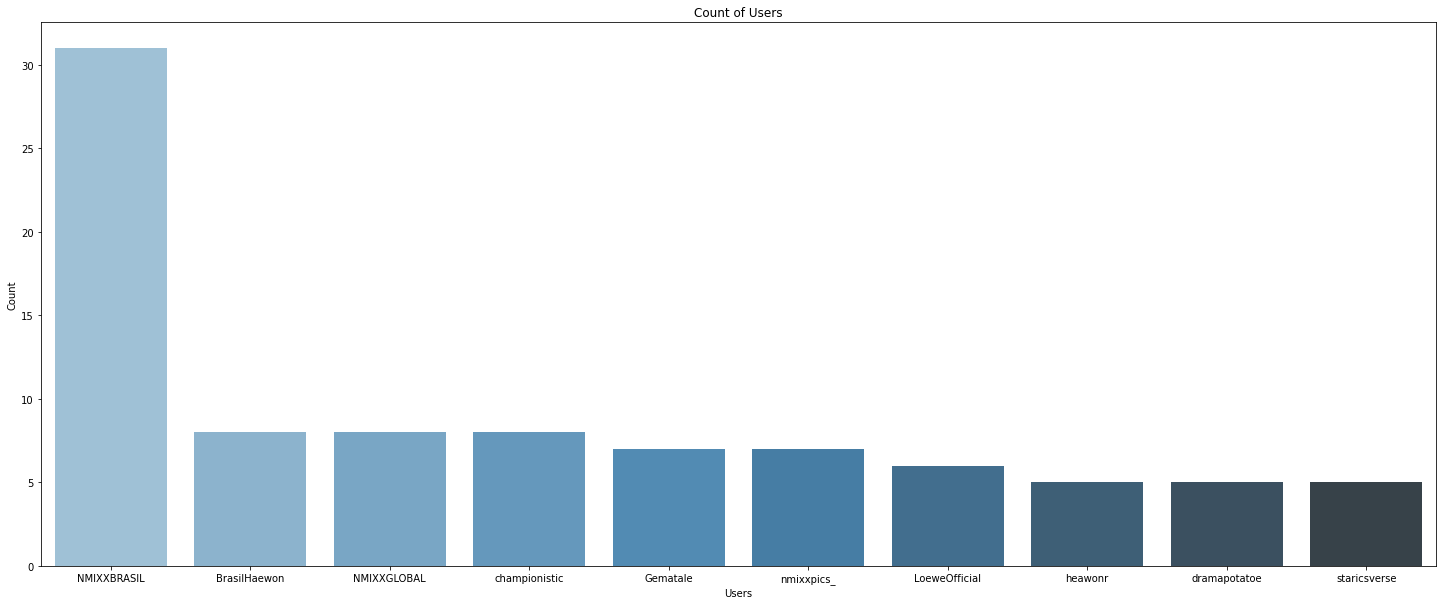

In [98]:
plt.figure(figsize = (25,10))
sns.barplot(x='User profile',y = 'Count',data = top_users,palette = 'Blues_d')
plt.title("Count of Users")
plt.xlabel("Users")
plt.ylabel("Count")
plt.show